# Unsupervised Learning Techniques


## Introduction
In this notebook, we are going to discuss Unsupervised Learning and Hierarchical Clustering. 
What is Unsupervised Learning?

It is a Machine Learning technique in which instead of learning from training dataset(as in supervised learning), here model itself find hidden patterns and insights from the data. It create groups based on some similarity even without knowing what each group represent.

**Example:** 
We have group of students belongs to different university’s and we have to group them based on some feature, and we give this responsibility to unsupervised algorithms. Now we don’t know how unsupervised learning algorithms will group then. It may group them based on their uniforms or based on their height or based on their hair style. This is the way unsupervised algorithms work to find the hidden patters or similarity and group them.

# Unsupervised Learning 

Let's take an example to go through Unsupervised Learning. There is a dataset of customers and we want to organize it by grouping them, based on their income and spending pattern.

Remember that the data set only has data relating to individual customers and there is no data present in the dataset for different groups of customers.

Unsupervised learning is classified into two categories of algorithms: 

**Clustering:** A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior/income/age etc. There are also different types of clustering like K-mean clustering, Hierarchical clustering, affinity propagation etc

**Association:** An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y. There are also different types of clustering like Apriori algorithm, FP growth algorithm etc.

This data set is designed for learning purpose of the customer segmentation concepts. It will be demonstrated using an unsupervised ML technique (Hierarchical Clustering) in the simplest form.

By the end of such a case study , you would be able to answer following types of questions.

* How to achieve customer segmentation using machine learning algorithm (Clustering) in Python in simplest way.

* Who are your target customers with whom you can start marketing strategy

* How the marketing strategy works in real world
 
Read the articles https://medium.com/analytics-vidhya/unsupervised-learning-a-complete-overview-b433267e1c2a and https://www.geeksforgeeks.org/supervised-unsupervised-learning/ for more information. Also watch this video https://www.youtube.com/watch?v=cfj6yaYE86U for a context about the difference between supervised and unsupervised learning. While reading the articles try to think of some scenarios where you can use unsupervised learning where we can cluster different data points together from unlabelled data.

## Import required Libraries
Firstly, we will import the required libraries: pandas and numpy to provide data structure, and seaborn and matplotlib to create visualizations with underlying patterns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset:  Data Acquisition 

Source of the dataset - https://www.kaggle.com/datasets/shwetabh123/mall-customers


## Load/Read the dataset

In [2]:
#Read the dataset
#Your code here

dataset = pd.read_csv("[Dataset](MallCustomers).csv")

In [3]:
#Prints the first five entry of the dataframe
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Attribute Information-
This is a supermarket mall data. IT consists of some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Hierarchical Clustering

Clustering is the process of grouping data points based on similarity such that the data points with in a cluster are similar to one another and dissimilar to data points in other clusters. 
For instance, the data points as shown below are divided into three clusters. 
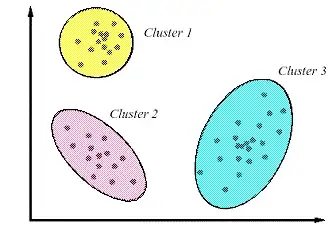

Hierarchical clustering is one of the type of clustering. It divides the data points into a hierarchy of clusters. It can be divided into two types- Agglomerative and Divisive clustering.

**Agglomerative clustering**

Agglomerative clustering follows a bottom-up approach. In agglomerative clustering, each data point is assigned to an individual cluster. At each iteration, the clusters are merged together based upon their similarity and the process repeats until one cluster or K clusters are formed. 


**Divisive clustering**

Divisive clustering follows a top-down approach. It is the opposite of Agglomerative clustering. In divisive clustering, all the data points are assigned to a single cluster. At each iteration, the clusters are separated into other clusters based upon dissimilarity and the process repeats until we are left with n clusters.


This is just an introduction, and we will limit the scope of this discussion to hierarchical clustering using the agglomerative clustering approach.


## Setting up the data for Hierarchical Clustering

### View the information of data

In [4]:
# info() helps summarize the dataset- It gives basic information like number of non-null values, datatypes and memory usage
# It is a good practise to start by this information
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Range Index is 200 and there are 200 non-null values for every column features which means there are no null entries and therefore we need not deal with missing values. 

### Check the number of rows and columns of the dataset

In [5]:
#It returns the column names of the given dataframe
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#It shows the number of rows and columns of the given dataframe
dataset.shape

(200, 5)

In [7]:
#It gives the numerical statistical information of the dataframe
"""
count - The number of non-empty values.
mean - The average value
std - The standard deviation
min - the minimum value
25% - The 25% percentile*
50% - The 50% percentile*
75% - The 75% percentile*
max - the maximum value """

dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Feature Selection


In [8]:
#your code here
x = dataset.iloc[:, [3,4]].values
x.shape

(200, 2)

## Using the dendrogram to find the optimal number of clusters

The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.
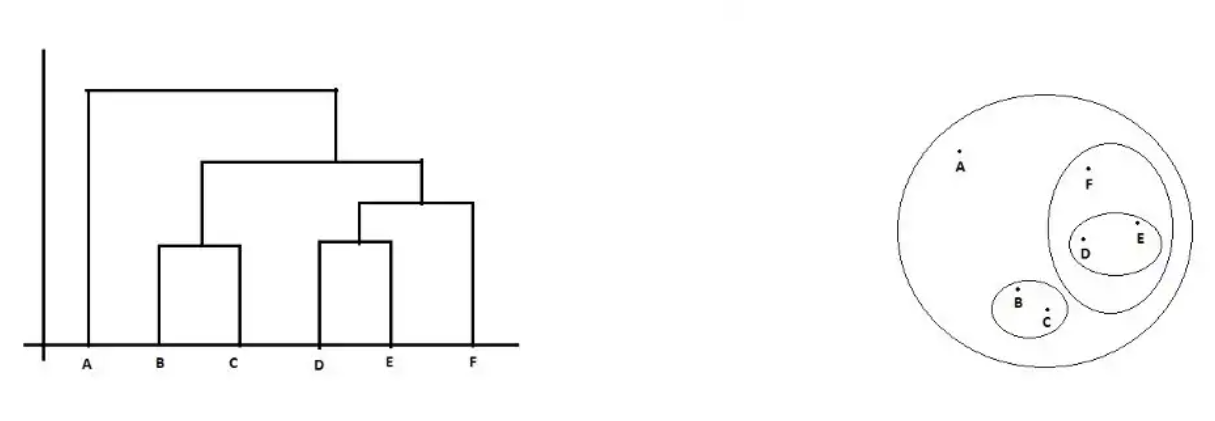

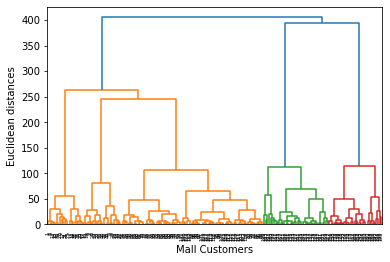

In [9]:
#your code here
#Create dendogram

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

#set the title of the dendrogram plot 
plt.xlabel("Mall Customers")

# Set the label for the y-axis 
plt.ylabel('Euclidean distances')

# Display the plot
plt.show()

## Building a model for agglomerative clustering

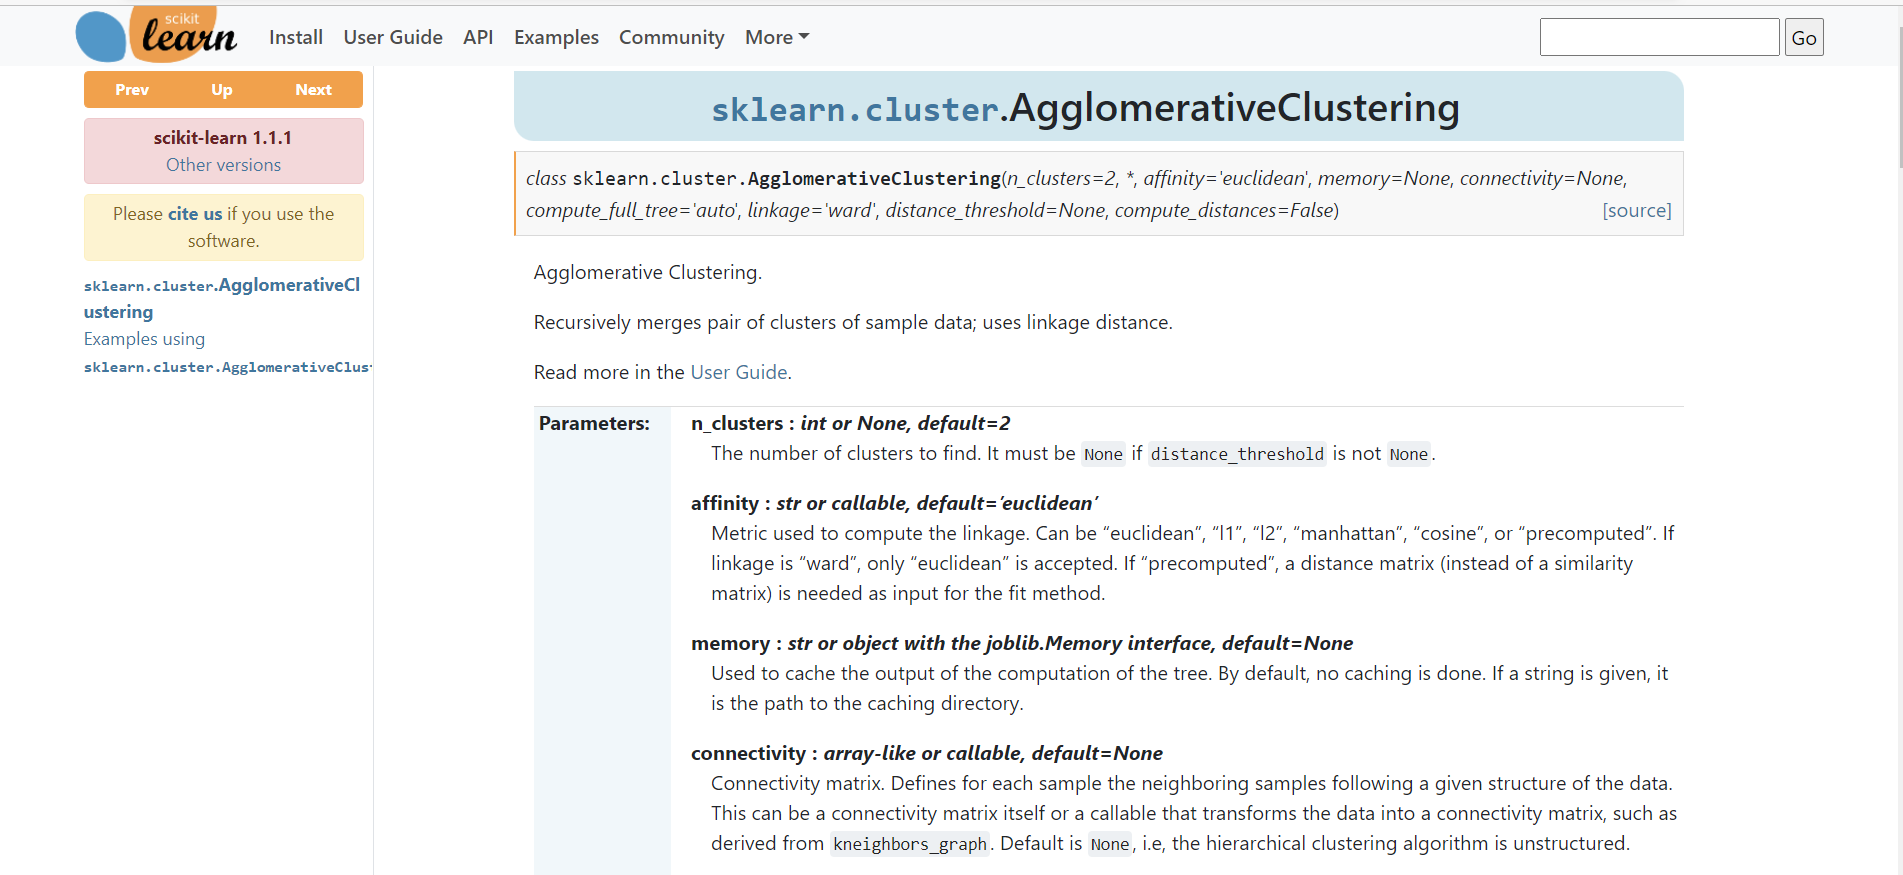

For more details: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [13]:
#your code here
#perform agglomerative clustering with euclidean 

# Import the agglomerative clustering model from sklearn 
from sklearn.cluster import AgglomerativeClustering

# Create an object od class 'hc' Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

# Training the Hierarchical Clustering model on the dataset
y_hc = hc.fit_predict(x)


**Let's change the parameter affinity/metric to manhattan distance method and also change the no of clusters to 3**


In [19]:
#your code here
#perform agglomerative clustering with manhattan 

hc1 = AgglomerativeClustering(n_clusters = 3,  linkage = 'average')

y_hc1 = hc1.fit_predict(x)

## Checking the performance of our model 

### Visualize the Model using y_hc

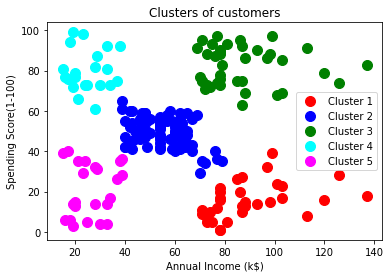

In [20]:
#your code here
#visualise with scatter plot 

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s = 100, c = 'red', label ='Cluster 1')

plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')

plt.xlabel('Annual Income (k$)')

plt.ylabel('Spending Score(1-100)')

plt.legend()
plt.show()


Observations - 
Cluster 1(Red) can be targeted specifically since they belong to high income group but their spending score is quite less.

### Visualize the Model using y_hc1

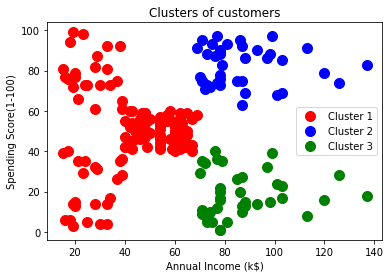

In [21]:
#your code here
#visualise with scatter plot 

plt.scatter(x[y_hc1 == 0,0], x[y_hc1 == 0,1], s = 100,  c = 'red',label = 'Cluster 1')

plt.scatter(x[y_hc1 == 1,0], x[y_hc1 == 1,1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(x[y_hc1 == 2,0], x[y_hc1 == 2,1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

## Observations:

1. Five Clusters are appropriate for this dataset - dendogram clearly helps us to identify the optimal number of clusters.
2. When we visualize with three clusters, output does not look right.